In [3]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

In [4]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data with 3000 data points with mean 0.7 and standard deviation of 0.3

In [51]:
obs_y = np.random.normal(0.7, 0.3, 3000)   #creating artificial data with mean 0.7 and std 0.3

1. Model with prior's mean and std as 0.0 and 1.0 respectively

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 953.93it/s] 
The acceptance probability does not match the target. It is 0.8893942352666454, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument ba

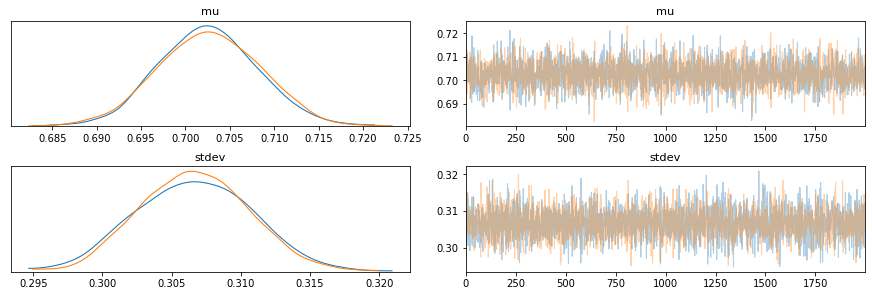

In [53]:
with pm.Model() as model1:

    stdev = pm.HalfNormal('stdev', sd=1.)
    mu = pm.Normal('mu', mu=0.0, sd=1.)

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(2000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

2. Model with just 100 datapoints .  Mean 0.0 and std 0.05

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1255.62it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/

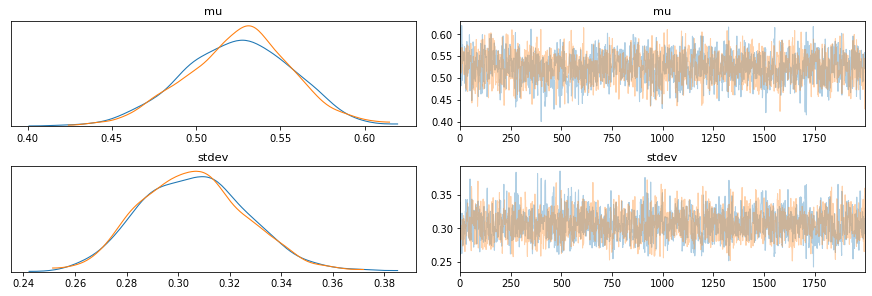

In [58]:
obs_y = np.random.normal(0.7, 0.3, 100)  # notice that we now have ONLY 100 data points in obs_y

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev', sd=0.05)  # notice that the sd is 0.05
    mu = pm.Normal('mu', mu=0.0, sd=0.05)  #  notice the sd is not 1 but is 0.05

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(2000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

3. Model with mean 0.0 and standard deviation 1.0 and number of datapoints 100.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1409.34it/s]
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/

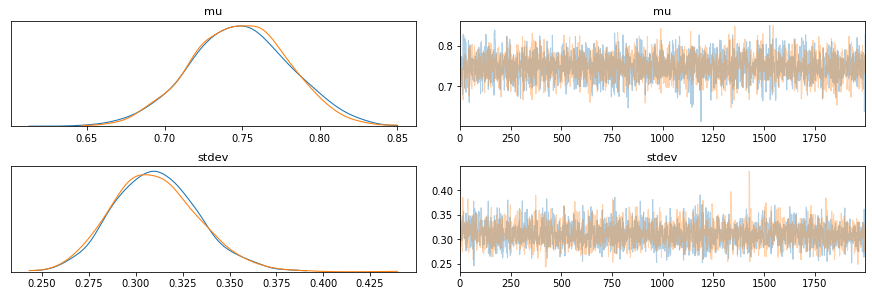

In [48]:
obs_y = np.random.normal(0.7, 0.3, 100)  # notice that we now have gone back to the original 2000 number of points

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev',sd=1.0)  # notice that the sd is 0.05
    mu = pm.Normal('mu', mu=0.0, sd=1.0)  #  notice the sd is not 1 but is 0.05

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(2000)   # draw 1000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, stdev]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:04<00:00, 600.60it/s]
The acceptance probability does not match the target. It is 0.9963555121305545, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9776347703867007, but should be close to 0.8. Try to increase the number of tuning steps.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs 

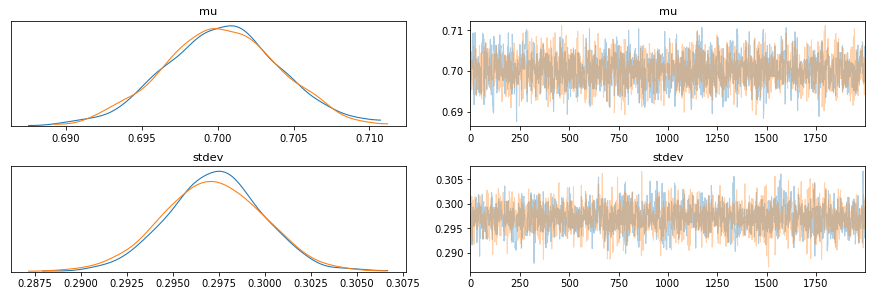

In [59]:
obs_y = np.random.normal(0.7, 0.3, 6000)  # notice that we now have gone back to the original 2000 number of points

with pm.Model() as exercise1:  # restricted PRIORs

    stdev = pm.HalfNormal('stdev',sd=0.05)  # notice that the sd is 0.05
    mu = pm.Normal('mu', mu=0.0, sd=0.05)  #  notice the sd is not 1 but is 0.1

    y = pm.Normal('y', mu=mu, sd=stdev, observed=obs_y)

    trace = pm.sample(2000)   # draw 2000 samples, of most likely values of mu and sd which will not be point values but distributions
    # trace is a dictionary for each random variable in the mode, in this case the mu and the sd, each having 1000 draws
    # the postrior distribution is what the modl believes these parameters will be AFTER having looked at the DATA 'obs_y' in this case.

    pm.traceplot((trace),['mu','stdev'])
    plt.show()